# ML/AI Crashcourse with Python Examples

This is going to be one of the denser sessions, but I will try my best to provide concrete examples and provide enough reference material that you can come back and do a deeper dive after the presentation. Also, right up top, to address the difference between Machine Learning and Artificial Intelligence, "artificial intelligence refers to the general ability of computers to emulate human thought and perform tasks in real-world environments, while machine learning refers to the technologies and algorithms that enable systems to identify patterns, make decisions, and improve themselves through experience and data." ([source](https://ai.engineering.columbia.edu/ai-vs-machine-learning/#:~:text=Put%20in%20context%2C%20artificial%20intelligence,and%20improve%20themselves%20through%20experience)). 


## Preface

I don't usually discuss my background in these sessions, but I think it is helpful and perhaps necessary here. Before starting at Square, I worked at Zoom as a Machine Learning Infrastructure Engineer and before that, I worked at Capital One as a Machine Learning Data Engineer. I have worked on recommendation engines, machine transcription, machine translation, various NLP chatbot projects, as well as more traditional machine learning projects like fraud detection, risk scoring, and GPV prediction using logistic and linear regression. So, why do I say this? A little bit is to add ethos, but it is also to preface everything I say with the knowledge that while I have worked in and around this space,  my exposure is still very limited, particularly around model development. Therefore, my goal is to give the best survey of the topic I can and caveat that there will certainly be gaps in knowledge and areas that could be more clearly laid out. If you are interested in diving deeper in this subject, I highly recommend checking out some of the many many links I have tried to add to this notebook that will take you to articles by people far more knowledgeable than myself. 

## Index

* [Glossary](#Glossary)
* [Overview](#Overview)
* [Machine Learning Lifecycle](#Machine-Learning-Lifecycle)
* [NLP Example](#NLP-Example)
* [Linear Regression Example](#Linear-Regression-Example)
* [Binary Classifier Example](#Binary-Classifier-Example)
* [A Not So Brief Note on ChatGpt](#A-Not-So-Brief-Note-on-ChatGpt)

## Glossary

Because reading is what? Fundamental

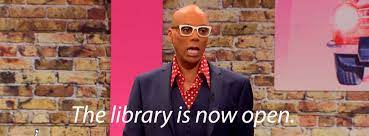

* **Algorithm**: A set of rules or instructions used to perform a specific task or solve a problem. In machine learning, algorithms are used to learn from data and make predictions or decisions. For the modern Machine Learning Engineer (MLE), algorithms can mean multiple things. On one hand, algorithms can apply to the underlying package the engineer is using to train the data. These model-type algorithms are work horses of ML and are often created by researchers and very senior engineers at ML focused companies. Algorithm also applies to the code the MLE writes to actually train a model. This is the bread and butter of the modern MLE and Data Scientist.


* **Model**: A mathematical representation of a problem or system that is used to make predictions or decisions. In machine learning, models are trained on data and then used to make predictions or decisions on new data. Really, a model is just a glorified python function where the logic is created by the underlying package used to train the model based on the data provided. Models can be [serialized](https://flynn.gg/blog/machine-learning-model-serialization/).  


* **Training**: The process of using a dataset to learn the parameters of a machine learning model. The model is trained on the data to minimize the error between the predicted output and the actual output.


* **Overfitting**: A phenomenon in machine learning where a model is trained too well on the training data, resulting in poor performance on new, unseen data. Overfitting occurs when the model is too complex and is able to fit the noise in the training data, rather than the underlying patterns.


* **Underfitting**: A phenomenon in machine learning where a model is not complex enough to capture the patterns in the data, resulting in poor performance on both the training and new data. Underfitting occurs when the model is too simple and is unable to fit the underlying patterns in the data.


* **Regularization**: A technique used in machine learning to prevent overfitting by adding a penalty term to the error function. The penalty term discourages the model from assigning too much importance to individual features, which helps to prevent overfitting.


* **Hyperparameters**: Parameters in a machine learning model that are set before training and are not learned from the data. Hyperparameters control the behavior of the model and can be used to prevent overfitting or underfitting.


* **Feature**: A characteristic or attribute of a dataset that is used as input to a machine learning model. Features are used by the model to make predictions or decisions.


* **Imputation**: The process of replacing missing data with substituted values.


* **Data Cleaning**: This involves identifying and handling missing values, outliers, and incorrect or inconsistent data. Depending on the data, this may involve techniques such as imputation, removal of outliers, or other data cleaning techniques.


* **One-Hot Encoding**: The process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction (i.e., ML models only like numbers, so turn things that aren't numbers into numbers). For instance, a field called feedback with the values "bad", "good", "great" becomes the values 1, 2, 3.


* **Data Preprocessing**: This involves transforming the data into a format that can be used by the machine learning model. This may involve techniques such as scaling or normalization, one-hot encoding, or other transformations to ensure that the data is in a consistent and standardized format.


* **Feature Engineering**: The process of transforming raw data into a set of meaningful features that can be used to train a machine learning model. The goal of feature engineering is to extract relevant information from the raw data and represent it in a format that can be easily processed by a machine learning algorithm.


* **Label**: The target or output variable in a supervised learning problem. The label is what the model is trying to predict based on the features.


* **Loss Function**: A mathematical function that measures the error between the predicted output and the actual output of a machine learning model. The loss function is used to evaluate the performance of the model and guide the training process.


* **Inference Pipeline**: A sequence of steps or processes that are used to make predictions or inferences based on input data. An inference pipeline typically involves several stages, including data preprocessing, feature extraction, and model inference.

* **Accuracy**: The total number of correct predictions over the total number of predictions.

* **Precision**: Total number of true positives over the total number of true positives plus the total number of false positives. Precision is a good metric when the most important thing is to maximize your identification of true positives.

* **Recall**: Total number of true positives over the total number of true positives plus the total number of false negatives. Recall should be the model metric we use to select our best model when there is a high cost associated with false negatives.

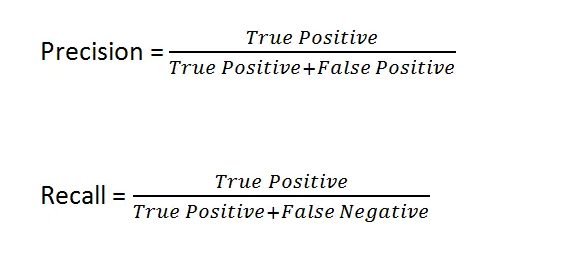

* **F1 Score**: Precision multiplied by recall over precision plus recall. Used to find balance between the two

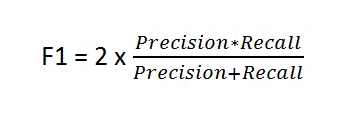

## Overview

Machine learning and artificial intelligence are broad fields with many sub-sections and applications. The fundamental underpinning of these disciplines is the endeavor to build models that will "learn" insights from data and then leverage that learning to either make predictions, improve processes, generate insights, etc. Below are some of the main players in the field of ML. It is important to note that these are not always mutually exclusive sub-disciplines. More on that below.


1. **Supervised Learning**: This is the most common type of machine learning where the algorithm is trained on a labeled dataset and then used to predict the label for new data. Examples of models used in supervised learning include linear regression, [logistic regression](https://www.ibm.com/topics/logistic-regression#:~:text=Resources-,What%20is%20logistic%20regression%3F,given%20dataset%20of%20independent%20variables.), [decision trees](https://www.ibm.com/topics/decision-trees), and [random forests](https://www.ibm.com/topics/random-forest). This is the classic ML problem where you have a large amount of structured data that is too large for a human to review and make meaningful connections, but a computer is able to find connections. Popular Python libraries: `scikit-learn`, `xgboost`, `TensorFlow`, and `PyTorch`.


*  Some example problems suited to supervised learning are:

    * **Credit scoring**: Given a set of input features about a customer, such as their income, credit history, and age, predict whether they are likely to default on a loan or not.

    * **Spam filtering**: Given an email message, predict whether it is spam or not.

    * **Predicting housing prices**: Given relevant data about homes like square footage, number of rooms, features, whether there is a pool, predict the value of the home.
    
    
* Illustration:


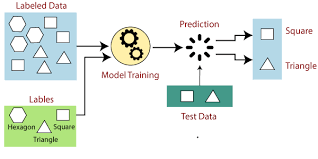

2. **Unsupervised Learning**: This type of machine learning involves training algorithms on unlabeled data and then finding patterns or relationships in the data. Examples of models used in unsupervised learning include k-means clustering, principal component analysis ([PCA](https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html)), and [autoencoders](https://www.jeremyjordan.me/autoencoders/). Popular Python libraries: `scikit-learn`, `TensorFlow`, and `PyTorch`.

*  Some example problems suited to unsupervised learning are:

    * **Clustering**: Given a set of input data points, group them into clusters based on their similarities. This can be solved using [k-means clustering](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1), [hierarchical clustering](https://towardsdatascience.com/understanding-the-concept-of-hierarchical-clustering-technique-c6e8243758ec), or [Gaussian mixture models](https://towardsdatascience.com/gaussian-mixture-models-explained-6986aaf5a95).

    * **Dimensionality reduction**: Given a high-dimensional dataset, reduce the dimensionality of the data while retaining its important features. This can be solved using principal component analysis (PCA), t-distributed stochastic neighbor embedding ([t-SNE](https://towardsdatascience.com/an-introduction-to-t-sne-with-python-example-5a3a293108d1)), or autoencoders.


    * **Anomaly detection**: Given a set of input data points, identify which data points are unusual or anomalous. This can be solved using [density-based clustering](https://www.dominodatalab.com/data-science-dictionary/density-based-clustering#:~:text=Density%2DBased%20Clustering%20refers%20to,other%20clusters%20by%20sparse%20regions.), such as local outlier factor ([LOF](https://scikit-learn.org/stable/auto_examples/neighbors/plot_lof_outlier_detection.html#:~:text=The%20Local%20Outlier%20Factor%20(LOF,lower%20density%20than%20their%20neighbors.)) or [isolation forest](https://www.analyticsvidhya.com/blog/2021/07/anomaly-detection-using-isolation-forest-a-complete-guide/).


    * **Association rule mining**: Given a set of transactions, identify which items are frequently bought together. This can be solved using the [Apriori algorithm](https://medium.com/analytics-vidhya/apriori-algorithm-in-association-rule-learning-9287fe17e944) or [FP-Growth algorithm](https://towardsdatascience.com/the-fp-growth-algorithm-1ffa20e839b8).

    
* Illustration:

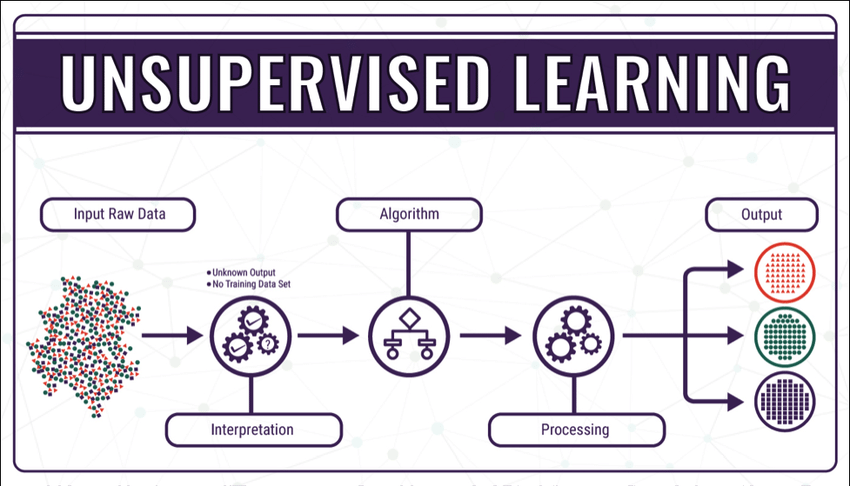


3. **Reinforcement Learning**: This type of machine learning involves training algorithms by having them take actions and receive rewards based on those actions. The algorithm learns to maximize the reward over time. Examples of models used in reinforcement learning include [Q-learning](https://www.simplilearn.com/tutorials/machine-learning-tutorial/what-is-q-learning#:~:text=Q%2Dlearning%20is%20a%20model,next%20action%20to%20be%20taken.) and Markov Decision Processes ([MDPs](https://www.spiceworks.com/tech/artificial-intelligence/articles/what-is-markov-decision-process/#:~:text=A%20Markov%20decision%20process%20(MDP)%20refers%20to%20a%20stochastic%20decision,makes%20sequential%20decisions%20over%20time.)). Popular Python libraries: `OpenAI` and `Keras-RL2`.

* Some examples of Reinforcement Learning include (all of these examples could be solved using models such as Deep Q-Networks ([DQNs](https://towardsdatascience.com/reinforcement-learning-explained-visually-part-5-deep-q-networks-step-by-step-5a5317197f4b)), [Policy Gradients](https://towardsdatascience.com/policy-gradients-in-a-nutshell-8b72f9743c5d), or [Actor-Critic models](https://towardsdatascience.com/understanding-actor-critic-methods-931b97b6df3f)):

    * **Game playing**: Given a game environment, such as chess or Go, learn a policy for playing the game that maximizes the player's chances of winning.

    * **Robotics control**: Given a robotic system, learn a policy for controlling the robot's actions to achieve a particular goal, such as picking and placing objects.

    * **Dialogue systems**: Given a conversational agent, learn a policy for selecting responses to user input that maximize the user's satisfaction.


* Illustration:

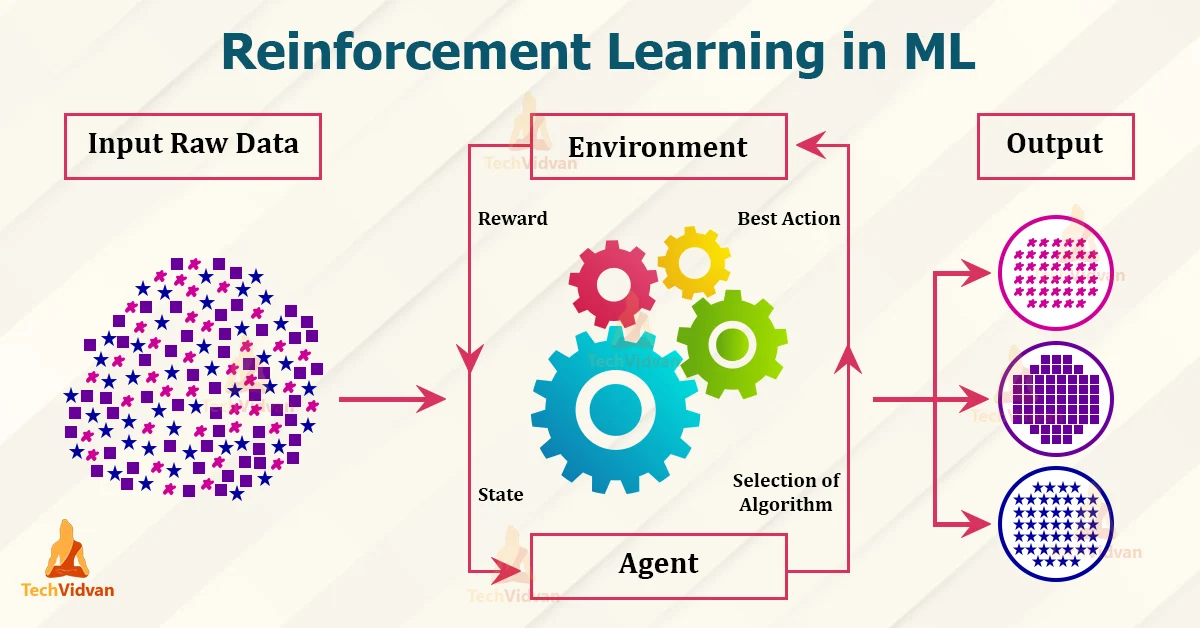


* **NOTE**: If you are interested in Reinforced Learning, I highly recommend checking out [AWS Deep Racer](https://aws.amazon.com/deepracer/). It is a competition that happens every year where teams use reinforcement learning to race first virtual then real cars around a track.


4. Deep Learning: This sub-section of machine learning involves training algorithms on large amounts of data using artificial neural networks. Deep learning is a sub-section of Supervised Learning. Examples of models used in deep learning include convolutional neural networks ([CNNs](https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53)), recurrent neural networks ([RNNs](https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-recurrent-neural-networks)), and long short-term memory ([LSTM](https://colah.github.io/posts/2015-08-Understanding-LSTMs/)) networks. Popular Python libraries: `TensorFlow`, `Keras`, and `PyTorch`.

* Some example problems suited to Deep Learning are:

    * **Music generation**: Given a set of input features, such as a musical score or genre, generate a new musical composition. This can be solved using deep learning models, such as generative adversarial networks ([GANs](https://magenta.tensorflow.org/gansynth)) or recurrent neural networks (RNNs).
    
        * Interesting [article](https://venturebeat.com/datadecisionmakers/how-dall-e-2-could-solve-major-computer-vision-challenges/#:~:text=While%20image%20generating%20techniques%20such,consistency%2C%20i.e.%20understanding%20the%20relationship) about the relationship between GANs and [Dall-e 2](https://openai.com/dall-e-2/)

    * **Speech synthesis**: Given a text transcript, generate synthetic speech that sounds natural and expressive. Example models you could use are [WaveNet](https://www.deepmind.com/blog/wavenet-a-generative-model-for-raw-audio) or [Tacotron](https://ai.googleblog.com/2017/12/tacotron-2-generating-human-like-speech.html).

    * **Recommendation systems**: Given a user's preferences and behavior, recommend items or content that are likely to be of interest to the user. This can be solved using deep learning models, such as [collaborative filtering](https://developers.google.com/machine-learning/recommendation/collaborative/basics) or [matrix factorization](https://towardsdatascience.com/recommendation-system-matrix-factorization-d61978660b4b).



5. Natural Language Processing (NLP): This sub-section of AI involves using machine learning algorithms to process and understand human language. Examples of models used in NLP include sentiment analysis, text classification, and language translation. Popular Python libraries: `NLTK`, `spaCy`, and `TensorFlow`.

* Some example problems suited to NLP are:


    * **Topic modeling**: Given a collection of documents, identify which topics are discussed in the documents and which documents belong to which topics. This can be solved using Latent Dirichlet Allocation ([LDA](https://towardsdatascience.com/topic-modeling-and-latent-dirichlet-allocation-in-python-9bf156893c24)) or Non-negative Matrix Factorization ([NMF](https://www.analyticsvidhya.com/blog/2021/06/part-15-step-by-step-guide-to-master-nlp-topic-modelling-using-nmf/)).
    
    * **Sentiment analysis**: Given a text document, determine the sentiment, such as positive, negative, or neutral. This can be solved using models such as logistic regression, support vector machines ([SVMs](https://medium.com/@vasista/sentiment-analysis-using-svm-338d418e3ff1)), or recurrent neural networks (RNNs).
    
    * **Question-answering**: Given a question and a collection of data (i.e., knowledge base), identify the answer to the question. This can be solved using models such as Bidirectional Encoder Representations from Transformers ([BERT](https://medium.com/analytics-vidhya/question-answering-system-with-bert-ebe1130f8def#:~:text=Question%20Answering%20System%20using%20BERT&text=For%20the%20Question%20Answering%20System,embeddings%20and%20the%20segment%20embeddings.)), which uses a combination of masked language modeling and next sentence prediction.
    
    * **Machine translation**: Given a sentence in one language, translate it into another language. This can be solved using models such as sequence-to-sequence models with attention or transformer models.
    
    * **Part of speech tagging**: Given a sentence, identify the parts of speech and the grammatical relation ship of each word to the others. Models include the Markov Model and its variants Hidden Markov Model (HMM) and Chain Markov Model (CMM) (see [details](https://www.freecodecamp.org/news/an-introduction-to-part-of-speech-tagging-and-the-hidden-markov-model-953d45338f24/)).


6. Computer Vision: This sub-section of AI involves using machine learning algorithms to analyze and understand visual data, such as images and videos. Examples of models used in computer vision include image classification, object detection, and image segmentation. Popular Python libraries: `OpenCV`, `TensorFlow`, and `PyTorch`.

* Some example problems suited to Computer Vision are:

    * **Object detection**: Given an image or video, identify and localize multiple objects in the scene. This can be solved using models such as [Faster R-CNN](https://blog.paperspace.com/faster-r-cnn-explained-object-detection/), You Only Look Once ([YOLO](https://towardsdatascience.com/yolo-you-only-look-once-real-time-object-detection-explained-492dc9230006)), or [RetinaNet](https://developers.arcgis.com/python/guide/how-retinanet-works/).

    * **Image segmentation**: Segment a given image into regions that correspond to different objects or parts of objects. This can be solved using models such as Mask R-CNN, U-Net, or DeepLab.

    * **Image classification**: Given an image, classify it into one or more categories, such as animal, vehicle, or building. This can be solved using models such as VGG (Visual Geometry Group) network, ResNet (Residual Network), or Inception network.

    * **Image generation**: Given a set of input features, such as a text description or a style, generate a new image. This can be solved using models such as GAN (Generative Adversarial Network) or Variational Autoencoder (VAE).



## Machine Learning Lifecycle

One of the main things I want to impress is that no matter what problem you are trying to solve using ML or AI techniques, there is a lot more that goes into it than just developing a model. Below is a decent representation of the basic lifecycle of an ML project, but we will tweak some of the steps listed:

[source](https://www.wallaroo.ai/blog/production-ml)
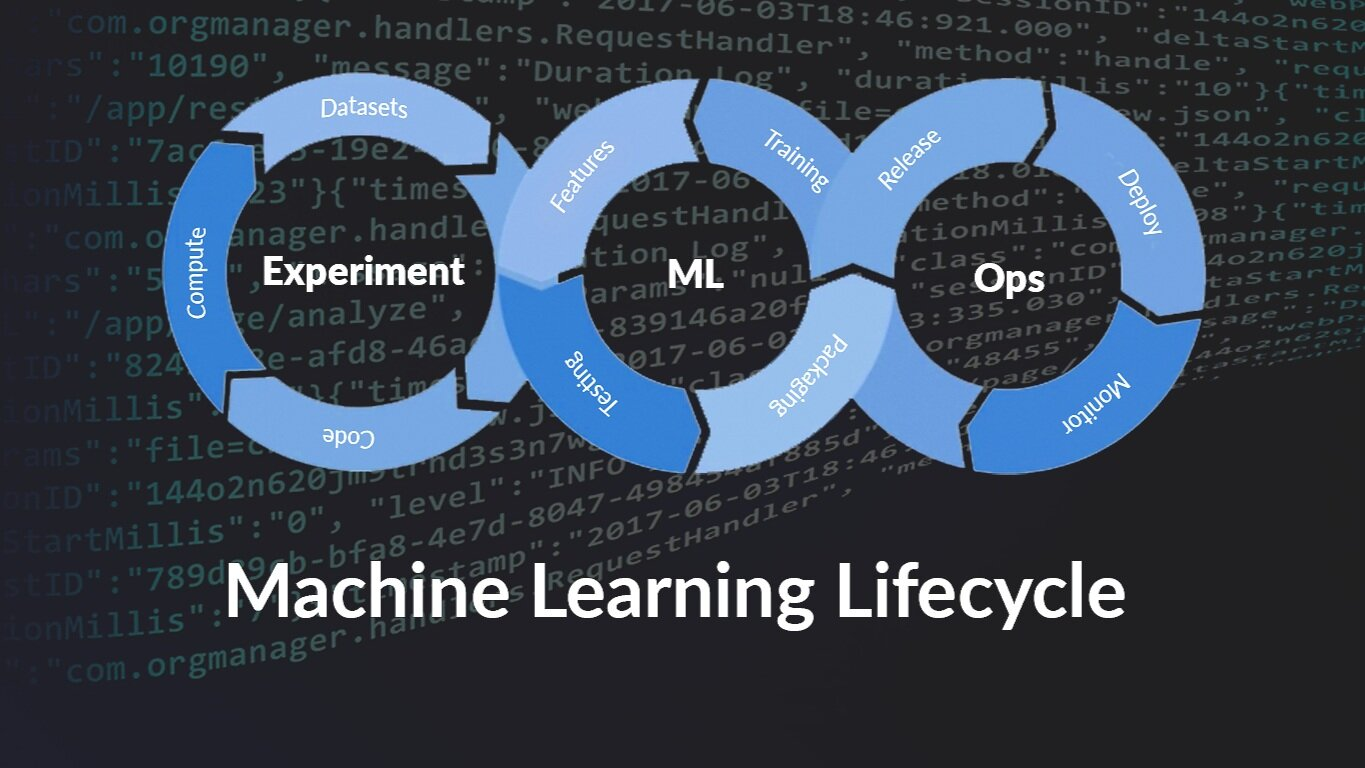

In the above diagram, the responsibilities of each circle and subsection within it is split between different roles and teams. Full disclosure, this is an ever evolving field and every company handles the division of labor slightly differently, but in my experience, this is the breakdown of who is responsible for each section:

**Experiment**

Historically, this has been the millieu of Data Scientists or ML Modelers (largely interchangeable titles). A more modern approach is to have this step handled by Machine Learning Engineers ([further reading](https://www.kdnuggets.com/2020/11/moving-data-science-machine-learning-engineering.html)). Machine Learning Engineers are expected to take an ML problem from Experimentation through packaging, and sometimes to deployment and monitoring. The experimentation process generally involves:

* Gathering business requirements
* Gathering training data 
* Cleaning and labeling data 
* Feature Engineering
* Testing various model types and algorithm approaches

**ML**

A better name for this category might be "Productionalization." This category involves not only the actual training of a model, but also solving the logistical challenges involved with deploying a model to production. The actual training was historically done by Data Scientists. The Data Scientists would then turn the model over to either Data Engineers or Software Engineers with an ML focus who would handle the remaining steps. Steps generally include:

* Model Training
* Ensuring initial data cleaning and feature engineering steps are reproducible and applied to new data the model is used on
* Packaging all code required for model deploy (often involves making a pip installable package that handles data cleaning and model predictions and/or containerizing code)
* Determining appropriate design for and implementation of inference pipeline (batch, real-time, rest API, GRPC, etc.)
* Developing plan for online and/or offline model retraining in collaboration with MLOps
* Developing plan for model monitoring in collaboration with MLOps

**Ops**

This is one of the newer disciplines within the ML lifecycle, but one of the more important for ensuring the long term viability of ML products ([further reading](https://www.cio.com/article/402238/mlops-the-new-role-in-data-science.html#:~:text=MLOps%20is%20a%20very%20fresh,yet%2C%20but%20are%20considering%20it.)). Admittedly, I am biased here as this was my background before starting at Square. MLOps is still being defined in the industry, but in my experience, it is defined as someone with a good working knowledge of ML packages, techniques, and models but who also has a strong background in Software Engineering and Infrastructure/DevOps. Steps generally include:

* Deploying and managing infrastructure needed for model hosting, retraining, and monitoring using best practices (see [IaC](https://www.redhat.com/en/topics/automation/what-is-infrastructure-as-code-iac))
* Developing CI/CD pipeline for ML Model/Package to ensure best practices are adhered to with testing and deployment
* Developing a retraining pipeline in collaboration with other relevant engineers to account for model drift (see [model drift](https://towardsdatascience.com/model-drift-in-machine-learning-models-8f7e7413b563))

## NLP Example

Here, we will be looking at using Part of speech tagging (discussed above) to create a rudimentary chatbot that can read a dataset and answer basic analytical questions about the data.

In [1]:
import pandas as pd

data = [
    {"employee": 1, "sales": 2, "revenue": 3, 'manager_id': 1},
    {"employee": 2, "sales": 7, "revenue": 8, 'manager_id': 2},
    {"employee": 1, "sales": 7, "revenue": 8, 'manager_id': 3},
]

data = pd.DataFrame(data)

In [2]:
# Download the model we are using
!python3 -m spacy download en_core_web_md

import en_core_web_md

# Load the NLP model
nlp = en_core_web_md.load()

Looking in indexes: https://pypi.org/simple, https://nexus3.sqcorp.co/repository/pypi-square-general/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 34.9 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [6]:
import re
import spacy
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer


# Define a function to extract the relevant information from the user's question
def extract_info(question, df):
    # Create a list of column names
    column_names = df.columns.tolist()
    
    # Use CountVectorizer to create a bag-of-words representation of the column names
    vectorizer = CountVectorizer(analyzer='word')
    column_names_bow = vectorizer.fit_transform(column_names)
    
    # Use CountVectorizer to create a bag-of-words representation of the question
    question_bow = vectorizer.transform([question])
    # Compare the bag-of-words representations to find the most similar column name
    similarity = np.dot(question_bow, column_names_bow.T).A[0]
    most_similar_index = np.argmax(similarity)
    
    if np.all(similarity == 0):
        most_similar_column = None
    else:
        most_similar_column = column_names[most_similar_index]
    # Use spaCy to process and understand the question
    doc = nlp(question)
    
    # Use spaCy's built-in dependency parser to extract relationships between words
    dependencies = [(tok.text, tok.dep_, tok.head.text) for tok in doc]
    # Use the extracted entities and relationships to categorize the question
    operation = None
    for dep in dependencies:
        print(dep)
        if dep[1] in ["nsubj", "dobj"] and dep[0] == "mean":
            operation = "mean"
        elif dep[1] in ["nsubj", "dobj"] and dep[0] == "sum":
            operation = "sum"
        elif dep[1] == "amod" and dep[2] in ["values"]:
            operation = "count"
        elif dep[1] == "advmod" and dep[2] in ["many"]:
            operation = "count"
        elif dep[1] in ["nsubj", "dobj"] and dep[0] == "count":
            operation = "count"
        elif dep[1] in ["nsubj", "dobj"] and dep[0] == "median":
            operation = "median"
        elif dep[1] in ["nsubj", "dobj"] and dep[0] == "standard":
            operation = "std"
    
    return operation, most_similar_column

# Define a function to answer the user's question
def answer_question(question, data):
    info = extract_info(question, data)
    if info[0] is None:
        return "I'm sorry, I don't understand your question."
    operation, column = info
    try:
        if operation == "mean":
            result = data[column].mean()
        elif operation == "median":
            result = data[column].median()
        elif operation == "sum":
            result = data[column].sum()
        elif operation == "std":
            result = data[column].std()
        elif operation == "many":
            result = data[column].std()
        elif operation == "count":
            result = data[column].count()
        return "The {} of the {} column is {}.".format(operation, column, result)
    except KeyError:
        return "I'm sorry, I couldn't find the {} column in the data.".format(column)

# Test the model with a sample question
question = "What is the sum of the employee column?"
answer = answer_question(question, data)
print(answer)

('What', 'attr', 'is')
('is', 'ROOT', 'is')
('the', 'det', 'sum')
('sum', 'nsubj', 'is')
('of', 'prep', 'sum')
('the', 'det', 'column')
('employee', 'compound', 'column')
('column', 'pobj', 'of')
('?', 'punct', 'is')
The sum of the employee column is 4.


## Linear Regression Example

Linear regression is a simple machine learning algorithm that tries to find the relationship between two variables, one of which is the independent variable (i.e., the predictor variable) and the other is the dependent variable (i.e., the response variable).

In a linear regression model, we assume that the relationship between the two variables is linear, which means that we can use a straight line to represent the relationship between the variables. The goal of the algorithm is to find the best-fitting line that represents the relationship between the variables.

To do this, the algorithm uses a training dataset that contains values for both the independent and dependent variables. The algorithm then fits a line to the data by finding the slope and intercept of the line that minimizes the difference between the predicted values and the actual values in the training data.

Once the line has been fitted to the training data, it can be used to make predictions on new data, where the value of the independent variable is known but the value of the dependent variable is not. The algorithm uses the line to predict the value of the dependent variable for the given value of the independent variable.

Linear regression is a simple and interpretable algorithm that can be used to model a wide variety of relationships between two variables. However, it does have some limitations, such as the assumption of a linear relationship between the variables and the requirement that the independent variable is measured without error.

In [ ]:
import pandas as pd
import numpy as np
import random

employee_one_sales = 1
employee_two_sales = 100_000_000
month = 1

data = []

# Build fake training data
while employee_two_sales > employee_one_sales:
#     random.seed(employee_one_sales)
#     data.append({'employee': 1, 'sales': employee_one_sales, 'revenue': int(random.random() * 100), 'month': month})
#     random.seed(employee_two_sales)
#     data.append({'employee': 2, 'sales': employee_two_sales, 'revenue': int(random.random() * 100), 'month': month})
    data.append({'employee': 1, 'sales': employee_one_sales, 'revenue': int(employee_one_sales * 2), 'month': month})
    data.append({'employee': 2, 'sales': employee_two_sales, 'revenue': int(employee_two_sales / 2), 'month': month})    
    month += 1
    employee_one_sales = employee_one_sales * 2
    employee_two_sales = employee_two_sales / 2
    


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Create a pandas DataFrame from the data
df = pd.DataFrame(data)


# Split the data into a training set and a test set
train, test = train_test_split(df, test_size=0.2, shuffle=False)

# Train the linear regression model on the training data
model = LinearRegression()
model.fit(train[['month', 'employee', 'revenue']], train['sales'])

# Make predictions on the test data
predictions = model.predict(test[['month', 'employee', 'revenue']])

# Evaluate the model's performance
print('Mean Absolute Error:', metrics.mean_absolute_error(test['sales'], predictions))
print('Mean Squared Error:', metrics.mean_squared_error(test['sales'], predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test['sales'], predictions)))


In [ ]:
test[['month', 'employee', 'revenue']]

In [ ]:
prediction_diffs = pd.DataFrame(test[['month', 'employee', 'revenue', 'sales']])
prediction_diffs['predictions'] = predictions
prediction_diffs['diff_raw'] = prediction_diffs['predictions'] - prediction_diffs['sales']
prediction_diffs['diff_percent'] = prediction_diffs['diff_raw'] / prediction_diffs['sales']
prediction_diffs['diff_percent'] = pd.to_numeric(prediction_diffs['diff_percent'], errors='coerce').fillna(0).map("{:.2%}".format)


In [ ]:
prediction_diffs

In [ ]:
new_data = pd.DataFrame({
    'employee': [3, 3, 3],
    'revenue': [0, 5, 15],
    'month': [11, 12, 13]
})

# Use the trained model to make predictions on the new data
predictions = model.predict(new_data[['month', 'employee', 'revenue']])

# Print the predictions
print(predictions)

## Binary Classifier Example

This is a more classic ML use case. Here we will be using a Logistic Regression model to do a binary classification on health data. The goal here is to create a model that will tell us whether a patient is likely to develop diabetes based on relevant health data.

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn import preprocessing

# Load the dataset from a CSV file
df = pd.read_csv('diabetes.csv')

# Preview the first 5 rows of the dataset
df.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [8]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('Outcome', axis=1), df['Outcome'], test_size=0.2, random_state=42)


# Train a logistic regression model on the training data
model = LogisticRegression()

# We will uncomment this to resolve error and demonstrate hyperperameter tuning
# model = LogisticRegression(max_iter=10000, solver='saga')
model.fit(X_train, y_train)


# Use the model to make predictions on the test data
y_pred = model.predict(X_test)


# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print('Accuracy:', accuracy)
print('Confusion matrix:')
print(confusion)


Accuracy: 0.7467532467532467
Confusion matrix:
[[78 21]
 [18 37]]


/Users/chasehudson/miniforge3/envs/code-dojo/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


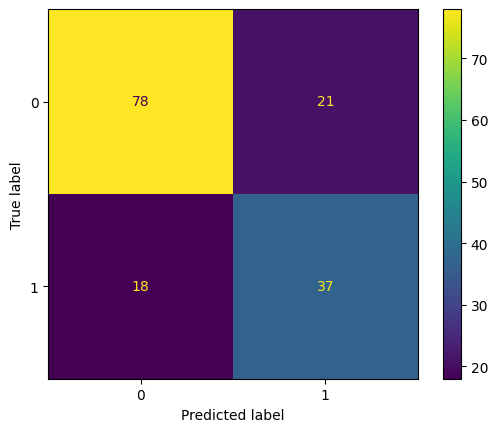

In [9]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion, display_labels=model.classes_)
disp.plot()

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {'C': [0.1, 1, 10],
              'penalty': ['l1', 'l2'],
              'solver': ['liblinear', 'saga']}

# Create a logistic regression model
model = LogisticRegression(max_iter=10000, solver='saga')

# Create a grid search object to find the best hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=5)

# Fit the grid search object to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the score
print('Best hyperparameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

Best hyperparameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Best score: 0.7655204584832733


In [11]:
# Use the model to make predictions on the test data
y_pred = grid_search.predict(X_test)


# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print('Accuracy:', accuracy)
print('Confusion matrix:')
print(confusion)

Accuracy: 0.7532467532467533
Confusion matrix:
[[80 19]
 [19 36]]


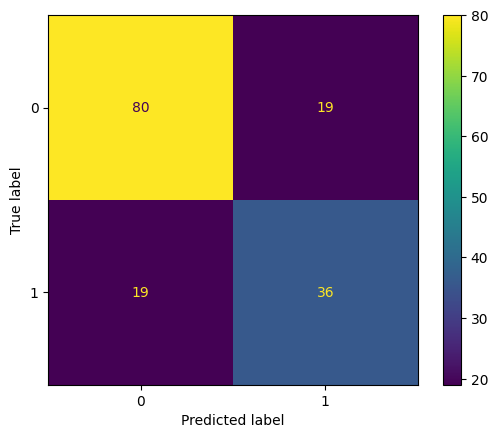

In [12]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion, display_labels=grid_search.classes_)
disp.plot()

### Demystifying Pickles

I briefly wanted to discuss what happens to models after they are created and how they are written to disk and reused. It is all through the magic of [serialization](https://machinelearningmastery.com/a-gentle-introduction-to-serialization-for-python) and a built-in Python package called [pickle](https://docs.python.org/3/library/pickle.html)

In [13]:
import pickle


pickle.dump(grid_search, open('model.pkl','wb'))

In [14]:
new_model = pickle.load(open('model.pkl','rb'))
y_pred = new_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print('Accuracy:', accuracy)
print('Confusion matrix:')
print(confusion)

Accuracy: 0.7532467532467533
Confusion matrix:
[[80 19]
 [19 36]]


## A Not So Brief Note on ChatGpt

ChatGPT is a large-scale language model based on the transformer architecture. Specifically, it is based on the GPT (Generative Pre-training Transformer) family of models, which are trained using unsupervised pre-training on large amounts of text data, followed by fine-tuning on specific downstream tasks.

Technically, the GPT models use a variant of the transformer architecture that was introduced by Vaswani et al. in the paper "Attention Is All You Need" ([citation](https://arxiv.org/pdf/1706.03762.pdf)). The transformer architecture is a type of neural network architecture that uses self-attention mechanisms to process input sequences of tokens and generate output sequences. It uses self-attention mechanisms to process input sequences of tokens and generate output sequences. Self-attention allows the model to attend to different parts of the input sequence at different time steps, without having to rely on a fixed-length context window like in traditional recurrent neural networks ([RNN](https://www.ibm.com/topics/recurrent-neural-networks)) .

During pre-training, the GPT model is trained to predict the next word in a sequence given the preceding context. This is done by masking out a random subset of the input tokens and then training the model to predict the missing token based on the remaining context. This task is known as language modeling ([LM](https://catalog.ngc.nvidia.com/orgs/nvidia/collections/languagemodelling)).

After pre-training, the GPT model can be fine-tuned on a variety of downstream tasks, such as [text classification](https://towardsdatascience.com/text-classification-applications-and-use-cases-beab4bfe2e62), [language generation](https://www.aidataanalytics.network/data-science-ai/articles/what-is-natural-language-generation), or [question-answering](https://learn.microsoft.com/en-us/azure/cognitive-services/language-service/question-answering/overview). Fine-tuning involves training the model on a smaller labeled dataset for the specific task, while keeping the pre-trained weights fixed or only updating them slightly.

As a high level overview of its architecture, ChatGPT is built on the transformer architecture and uses unsupervised pre-training followed by fine-tuning to achieve high performance on a variety of natural language processing tasks.

One more note on the actual training, ChatGPT is trained on a very large amount of text data, specifically on a corpus of diverse web pages known as the WebText corpus. The WebText corpus was created by scraping web pages from a wide range of domains, resulting in a dataset with a diverse set of topics and writing styles.

The original GPT-1 model, on which ChatGPT is based, was trained on a dataset of approximately 40GB of text, which corresponds to around 8 million web pages. The GPT-2 model, which is a larger version of the GPT-1 model, was trained on a larger dataset of approximately 45 terabytes of text data, which corresponds to around 40,000 books or a large fraction of the entire internet.

The exact size of the WebText corpus used to train ChatGPT is not publicly disclosed by OpenAI, but it is likely to be similar in scale to the dataset used to train GPT-2, given that ChatGPT is a relatively large model. The large amount of training data is one of the key factors contributing to ChatGPT's language generation capabilities.

Sources:
* [Improving Language Understanding by Generative Pre-Training](https://s3-us-west-2.amazonaws.com/openai-assets/research-covers/language-unsupervised/language_understanding_paper.pdf)
* [What is ChatGPT, how does it work, and how is it impacting academia?](https://westerntoday.wwu.edu/features/what-is-chatgpt-how-does-it-work-and-how-is-it-impacting-academia)
* [Better Language Models and Their Implications](https://openai.com/blog/better-language-models/)
* [How to build a State-of-the-Art Conversational AI with Transfer Learning](https://medium.com/huggingface/how-to-build-a-state-of-the-art-conversational-ai-with-transfer-learning-2d818ac26313)



## Key Takeaways

* **Machine Learning is as varied a field as Software Engineering**: ML is an incredibly broad field with many sub disciplines that are quite different from each other and require different skill sets, knowledge bases, and appetites for complex math. This is analagous to Software Engineering where you can have front end SWEs, back end SWEs, mobile SWEs, and every subsection therein.


* **Most ML problems are data/domain specific**: When most people think of problems that can be solved with ML, some examples my be: a chatbot that can answer common questions that can generally be found in internal documentation (NLP), predicting revenue of a given population of customers (supervised learning), anomoly detection (can be accomplished through supervised or unsupervised learning), etc. The one thing all of these questions have in common is they all require data specific to your circumstance which usually means it will be difficult to farm the problem to a 3rd party (see, **It takes a village** below). Additionally, many problems people think can be solved using ML involve some degree of trying to predict the future and...


* **Predicting the future is hard**: Often, the questions people want to answer with ML involve making inferences about future events based on past data. There are many options for trying to accomplish this goal, and none are perfect. This process involves constant experimentation and monitoring, and ultimately...


* **It takes a village**: In order to create a maintain a successful ML product, you need far more than someone who understands how the underlying ML model works. The most successful ML shops I have seen had multiple teams working in collaboration with experts in data analysis, data cleaning and pipelining, ML modeling, software engineering, as well as ML infrastructure and monitoring. Tools like ChatGPT are amazing and exciting, but the simplicity of its use should not lull us into a false sense of the simplicity of the problems tools like ChatGPT can and will solve in the future.